# MACHINE LEARNING GROUP PROJECT 

### Group Members: Mila Gardini (54742), Monica Navas (54577), Helena Krumm (55577), Yassine, Marouan

## **Index**
* [Import libraries](#libraries)
* [Importing and Reading Data](#data)
* [Exploratory Data Analysis](#eda)
* [Model 1 : Decision Tree ](#model1)
* [Clustering](#cluster)

blablablabla

<a name="libraries"></a>
## Importing Libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report


import warnings
warnings.filterwarnings("ignore")

<a name="data"></a>
## Loading Dataset

In [238]:
df=pd.read_csv("./dataset/covtype_data.csv")

<a name="eda"></a>
## Exploratory Data Analysis

In [239]:
# Define column names
col_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology ',
             'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
             'Horizontal_Distance_To_Fire_Points']

# Generate names for binary columns based on their position
binary_col_names = [i+1 for i in range(4)]
binary_col_names += [i+1 for i in range(40)]

# Append the binary column names to the list of column names
col_names += binary_col_names

# Append the target variable name to the list of column names
col_names.append('Cover_Type_code')

# Rename the columns in the DataFrame
df.columns = col_names
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,32,33,34,35,36,37,38,39,40,Cover_Type_code
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [240]:
# Print the first few rows of the DataFrame
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,32,33,34,35,36,37,38,39,40,Cover_Type_code
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [241]:
# Print the summary statistics of the numerical columns
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,32,33,34,35,36,37,38,39,40,Cover_Type_code
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051465
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792,1.396500
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [242]:
# Print the count of each target value
df['Cover_Type_code'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9492
4      2747
Name: Cover_Type_code, dtype: int64

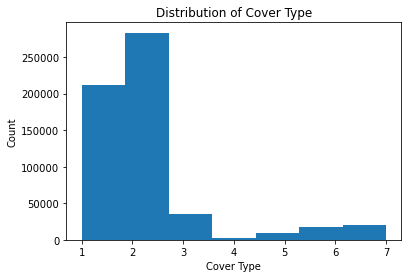

In [243]:
# Plot a histogram of the target variable
plt.hist(df['Cover_Type_code'], bins=7)
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.title('Distribution of Cover Type')
plt.show()

In [244]:
#Grouping the soil type columns into 1 column
df['Soil type code'] = df.iloc[:, 14:54].idxmax(axis=1)
df = pd.concat([df.iloc[:, :14], df.iloc[:, 54:]], axis=1)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,1,2,3,4,Cover_Type_code,Soil type code
0,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,5,29
1,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,2,12
2,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,2,30
3,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,5,29
4,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,2,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,3,2
581007,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,3,2
581008,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,3,2
581009,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,3,2


In [245]:
#Grouping the Wilderness Areas columns into 1 column
df['Wilderness area code'] = df.iloc[:, 10:14].idxmax(axis=1)
df = pd.concat([df.iloc[:, :10], df.iloc[:, 14:]], axis=1)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type_code,Soil type code,Wilderness area code
0,2590,56,2,212,-6,390,220,235,151,6225,5,29,1
1,2804,139,9,268,65,3180,234,238,135,6121,2,12,1
2,2785,155,18,242,118,3090,238,238,122,6211,2,30,1
3,2595,45,2,153,-1,391,220,234,150,6172,5,29,1
4,2579,132,6,300,-15,67,230,237,140,6031,2,29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,3,2,3
581007,2391,152,19,67,12,95,240,237,119,845,3,2,3
581008,2386,159,17,60,7,90,236,241,130,854,3,2,3
581009,2384,170,15,60,5,90,230,245,143,864,3,2,3


In [246]:
df1=df.copy()
#add a column with the description of codes for Soil type and wilderness areas
Wilderness_areas_list=['Rawah Wilderness Area','Neota Wilderness Area','Comanche Peak Wilderness Area' ,'Cache la Poudre Wilderness Area']
df1['Wilderness area description']=[Wilderness_areas_list[col-1] for col in df1['Wilderness area code']]

list_of_soil_type=pd.read_csv("./dataset/list_of_soil_types.csv")
list_of_soil_type=list(list_of_soil_type)
df1['soil type description']=[list_of_soil_type[col-1] for col in df1['Soil type code']]

new_order = [col for col in df1.columns if col != 'Cover_Type_code'] + ['Cover_Type_code']
df1 = df1[new_order]

cover_type_list=['Spruce/Fir','Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir','Krummholz']
df1['cover type description']=[cover_type_list[col-1] for col in df1['Cover_Type_code']]
df1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil type code,Wilderness area code,Wilderness area description,soil type description,Cover_Type_code,cover type description
0,2590,56,2,212,-6,390,220,235,151,6225,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",5,Aspen
1,2804,139,9,268,65,3180,234,238,135,6121,12,1,Rawah Wilderness Area,"Legault family - Rock land complex, stony.",2,Lodgepole Pine
2,2785,155,18,242,118,3090,238,238,122,6211,30,1,Rawah Wilderness Area,Como family - Rock land - Legault family compl...,2,Lodgepole Pine
3,2595,45,2,153,-1,391,220,234,150,6172,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",5,Aspen
4,2579,132,6,300,-15,67,230,237,140,6031,29,1,Rawah Wilderness Area,"Como - Legault families complex, extremely stony.",2,Lodgepole Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,2,3,Comanche Peak Wilderness Area,"Vanet - Ratake families complex, very stony.",3,Ponderosa Pine
581007,2391,152,19,67,12,95,240,237,119,845,2,3,Comanche Peak Wilderness Area,"Vanet - Ratake families complex, very stony.",3,Ponderosa Pine
581008,2386,159,17,60,7,90,236,241,130,854,2,3,Comanche Peak Wilderness Area,"Vanet - Ratake families complex, very stony.",3,Ponderosa Pine
581009,2384,170,15,60,5,90,230,245,143,864,2,3,Comanche Peak Wilderness Area,"Vanet - Ratake families complex, very stony.",3,Ponderosa Pine


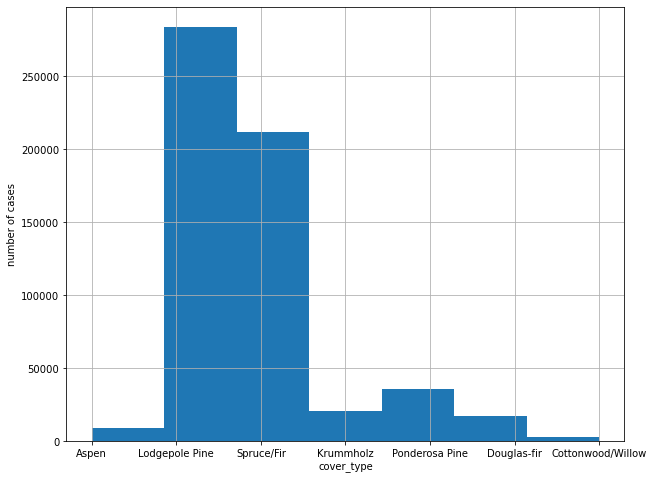

In [247]:
# plot a histogram of the 'cover type description' column
plt.figure(figsize=(10, 8))

df1['cover type description'].hist(bins=7)

# display the plot
plt.xlabel('cover_type')
plt.ylabel('number of cases')
plt.show()

<a name="model1"></a>

## Decision Tree

Accuracy: 0.7005068715953977
Recall: 0.4547998691018812


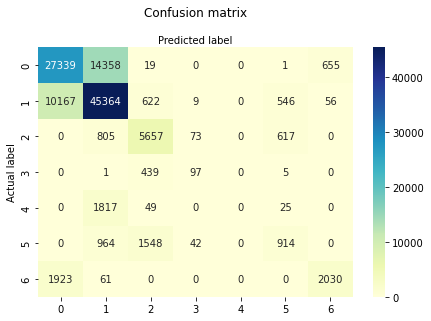

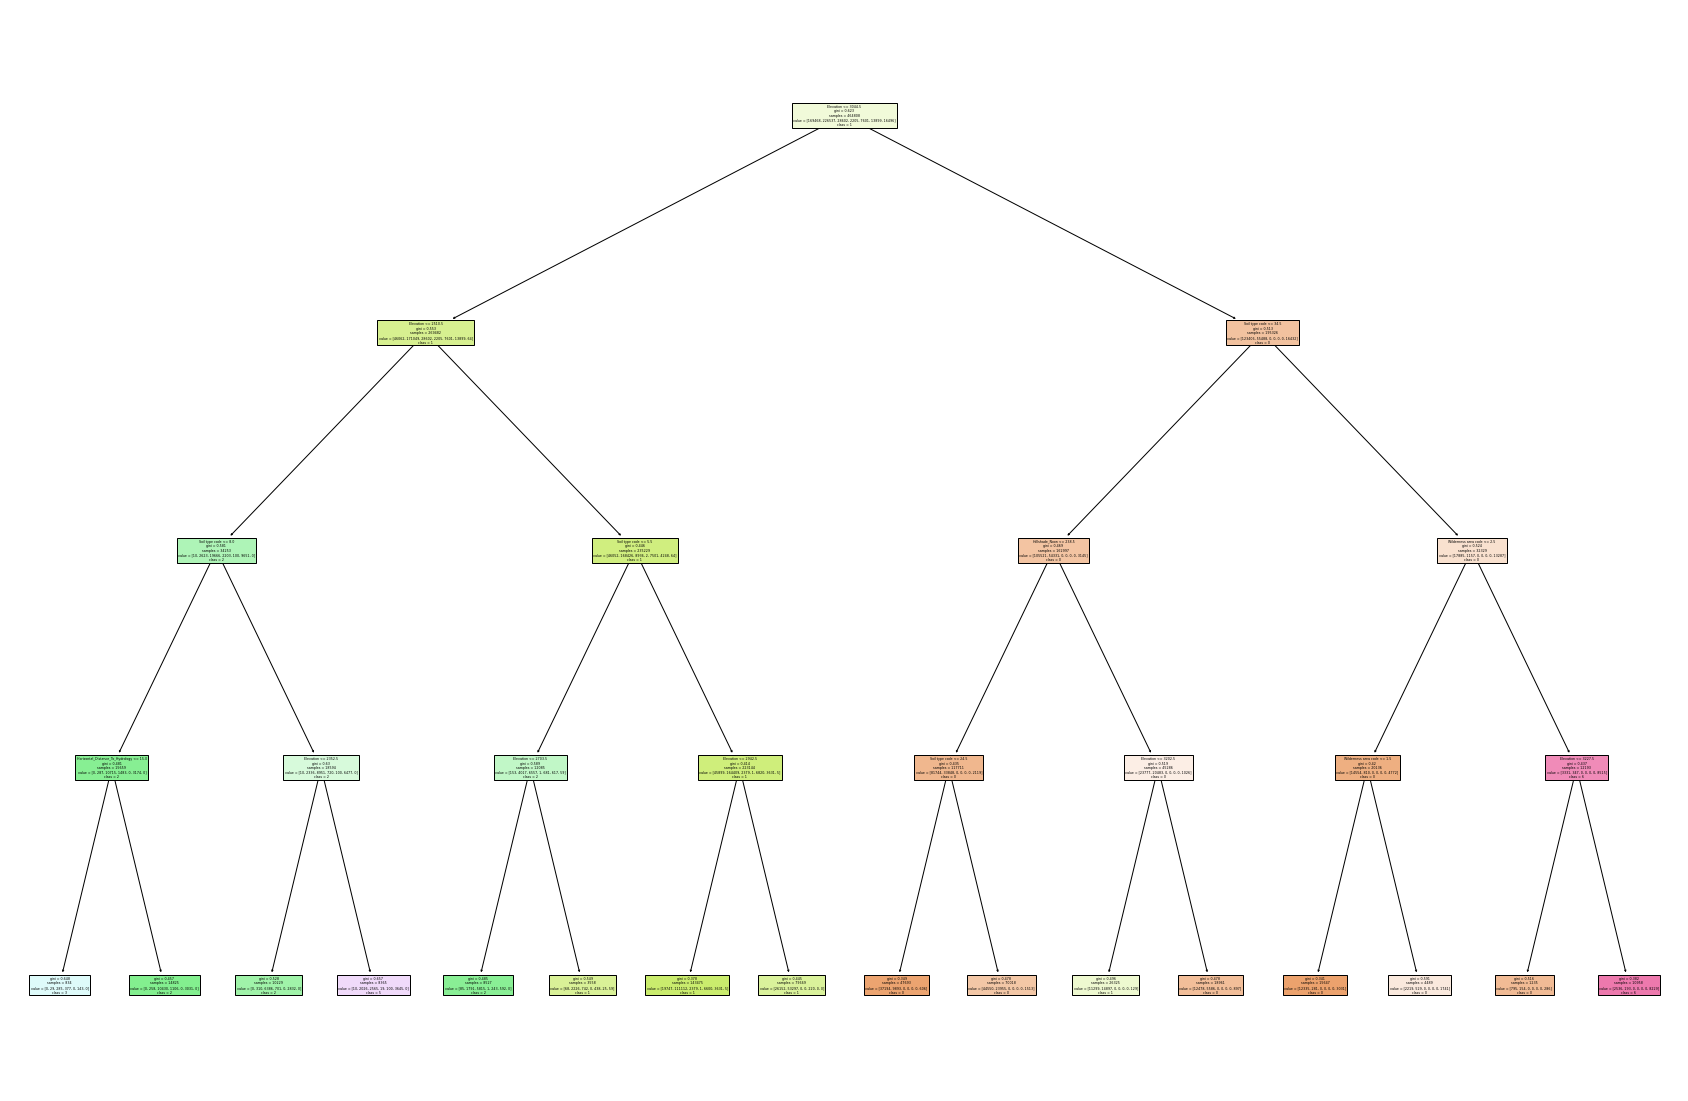

              precision    recall  f1-score   support

           0       0.69      0.65      0.67     42372
           1       0.72      0.80      0.76     56764
           2       0.68      0.79      0.73      7152
           3       0.44      0.18      0.25       542
           4       0.00      0.00      0.00      1891
           5       0.43      0.26      0.33      3468
           6       0.74      0.51      0.60      4014

    accuracy                           0.70    116203
   macro avg       0.53      0.45      0.48    116203
weighted avg       0.68      0.70      0.69    116203



In [248]:
#define features and target variables
X = df.drop("Cover_Type_code", axis=1) #FEATURES 
y = df["Cover_Type_code"] #TARGET VARIABLE
features = list(X.columns)

# Split the dfset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = tree.DecisionTreeClassifier(max_depth=4, random_state = 42)
clf.fit(X_train, y_train)

# Make predictions on the testing df
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the recall of the model
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calculate the confusion matrix of the model
cm = confusion_matrix(y_test, y_pred)

class_names=[0,1,2,3,4,5,6] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Visualize the decision tree
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names= features, class_names=['0','1', '2','3','4','5','6'], filled=True)
plt.show()

# Print the evaluation matrix
target_names = ['0','1', '2','3','4','5','6']
print(classification_report(y_test, y_pred, target_names=target_names))

In [249]:
#find accuracy and error 
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print("Tree Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
   
print("\n",'Train Mean Squared Error:', mean_squared_error(y_train, y_train_pred))
print("\n",'Test Mean Squared Error:', mean_squared_error(y_test, y_test_pred))

Tree Accuracy: 0.7005068715953977

 Train Mean Squared Error: 1.584936145677355

 Test Mean Squared Error: 1.572635818352366


For the sake of visualization, we can compare predictions and actual values (ground truth of the response variable). We can see that for the first 10 instances, it is always correct.

In [250]:
print(np.hstack((y_test_pred[:10,np.newaxis], y_test[:10,np.newaxis])))

[[2 1]
 [1 2]
 [2 2]
 [2 2]
 [1 1]
 [1 2]
 [1 2]
 [1 1]
 [1 2]
 [2 2]]


For now we will remove max deph to improve the aacuracy of our decision tree

In [251]:
X = df.drop("Cover_Type_code", axis=1) #FEATURES 
y = df["Cover_Type_code"] #TARGET VARIABLE
features = list(X.columns)

# Split the dfset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


print("Tree Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
   
print("\n",'Train Mean Squared Error:', mean_squared_error(y_train, y_train_pred))
print("\n",'Test Mean Squared Error:', mean_squared_error(y_test, y_test_pred))

Tree Accuracy: 0.9378673528222163

 Train Mean Squared Error: 0.0

 Test Mean Squared Error: 0.30555149178592633


Now let's incorporate Cross Validation= 5

In [252]:
from sklearn.model_selection import cross_val_score, KFold

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier()

# Making model training reproducible
np.random.seed(42)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv) 

print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

All the accuracies are: [0.93786735 0.93780658 0.93710091 0.93846922 0.94024199]
And the average crossvalidation accuracy is: 0.94 +- 0.00


In [253]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier()

# Making model training reproducible
np.random.seed(42)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv) 

# print(f"All the accuracies are: {scores}")
print(f"The average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

final_clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company

The average crossvalidation accuracy is: 0.94 +- 0.00


DecisionTreeClassifier()

### Checking hyperparameters to improve our model

Let's see the effect of changing from gini to entropy. We use holdout here. It seems that results are exactly the same.

In [254]:
# This loop checks what happens with the two criterions
for criterion in ["gini", "entropy"]:
    clf = tree.DecisionTreeClassifier(criterion=criterion)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With {criterion}: {accuracy_tree:.2f}")

With gini: 0.94
With entropy: 0.94


Let's see the effects of maximum_depth. "None" represents the maximum possible depth. 

In [255]:
for max_depth in [1,2,3,4,5,6,None]:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With max_depth {max_depth}: {accuracy_tree:.2f}")

With max_depth 1: 0.63
With max_depth 2: 0.67
With max_depth 3: 0.69
With max_depth 4: 0.70
With max_depth 5: 0.71
With max_depth 6: 0.73
With max_depth None: 0.94


Let's see the effects of min_samples_split. 2 is the default one being used

In [256]:
for min_samples in [2,10,20,30]:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_samples_split {min_samples}: {accuracy_tree:.2f}")

With min_samples_split 2: 0.94
With min_samples_split 10: 0.93
With min_samples_split 20: 0.92
With min_samples_split 30: 0.92


Finally, let's check another hyper-parameter called min_impurity_decrease: this means that a new level of the tree is created only if the information gain (that is, the decrease in entropy or gini) is larger than min_impurity_decrease. It is yet another way of controlling tree depth.

In [257]:
for min_impurity_decrease in np.linspace(0,2,num=10):
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_impurity_decrease {min_impurity_decrease}: {accuracy_tree:.2f}")

With min_impurity_decrease 0.0: 0.94
With min_impurity_decrease 0.2222222222222222: 0.49
With min_impurity_decrease 0.4444444444444444: 0.49
With min_impurity_decrease 0.6666666666666666: 0.49
With min_impurity_decrease 0.8888888888888888: 0.49
With min_impurity_decrease 1.1111111111111112: 0.49
With min_impurity_decrease 1.3333333333333333: 0.49
With min_impurity_decrease 1.5555555555555554: 0.49
With min_impurity_decrease 1.7777777777777777: 0.49
With min_impurity_decrease 2.0: 0.49


In [258]:
# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

inner = KFold(n_splits=3, shuffle=True, random_state=42)

# Definition of a 2-step process that self-adjusts 2 hyperpars
clf_g = GridSearchCV(tree.DecisionTreeClassifier(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Train the self-adjusting process
np.random.seed(42)
clf_g.fit(X=X_train, y=y_train)

# At this point, regr contains the model with the best hyper-parameters found by gridsearch
# and trained on the complete X_train

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
             scoring='neg_mean_squared_error', verbose=1)

Finding the best hyperparameters:

In [259]:
# Now, the performance of clf is computed on the test partition

print("MSE of tree with hyper-parameter tuning (grid-search)",mean_squared_error(y_test, clf_g.predict(X=X_test)))

print("Best parameters:", clf_g.best_params_)
print("Best score:", -clf_g.best_score_)

MSE of tree with hyper-parameter tuning (grid-search) 0.663984578711393
Best parameters: {'max_depth': 14, 'min_samples_split': 2}
Best score: 0.682348410526497


Now lets use Randomized Search instead of Grid Search to find the best hyperparamters

In [261]:
# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3, shuffle=True, random_state=42)

budget = 20
clf_r = RandomizedSearchCV(tree.DecisionTreeClassifier(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(42)
clf_r.fit(X=X_train, y=y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14]},
                   scoring='neg_mean_squared_error', verbose=1)

In [262]:
# Now, the performance of clf is computed on the test partition

print("MSE of tree with hyper-parameter tuning (randomized-search)",mean_squared_error(y_test, clf_r.predict(X=X_test)))

print("Best parameters:", clf_r.best_params_)
print("Best score:", -clf_r.best_score_)

MSE of tree with hyper-parameter tuning (randomized-search) 0.6673235630749637
Best parameters: {'min_samples_split': 6, 'max_depth': 14}
Best score: 0.6865006626391973


We obtained a better score with Randomized search where minimum samples split = 6 and max_depth =14 

<a name="cluster"></a>
## Clustering

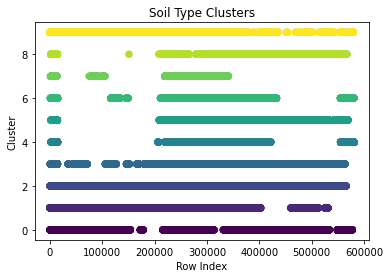

In [263]:
from sklearn.cluster import KMeans

# Get the soil type code column
soil_type_code = df['Soil type code']

# Initialize the KMeans object with 5 clusters
kmeans = KMeans(n_clusters=10)

# Fit the KMeans model on the soil type code column
kmeans.fit(soil_type_code.to_numpy().reshape(-1, 1))

# Get the cluster labels for each soil type code
cluster_labels = kmeans.labels_

# Add the cluster labels as a new column in the dataframe
df['Soil type cluster'] = cluster_labels
df

# the clustering gonna be in lines ( Circles gonna take a huge time to run ) 
plt.scatter(df.index, df['Soil type cluster'], c=df['Soil type cluster'])
plt.xlabel('Row Index')
plt.ylabel('Cluster')
plt.title('Soil Type Clusters')
plt.show()